In [19]:
import pandas as pd
import pickle
import numpy as np

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [21]:
import seaborn as sns

In [32]:
#한글폰트
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [61]:
df = pd.read_pickle('wafer_data.pkl')

In [24]:
df

,웨이퍼맵,웨이퍼크기,lotName,trianTestLabel,불량유형
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
...,...,...,...,...,...
172945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600,lot47542,[[Test]],[[Edge-Loc]]
172946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600,lot47542,[[Test]],[[Edge-Loc]]
172947,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600,lot47542,[[Test]],[[Edge-Ring]]
172948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600,lot47542,[[Test]],[[Edge-Loc]]


In [25]:
df.head()

,웨이퍼맵,웨이퍼크기,lotName,trianTestLabel,불량유형
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,[[Training]],[[none]]


In [26]:
df.tail()

,웨이퍼맵,웨이퍼크기,lotName,trianTestLabel,불량유형
172945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600,lot47542,[[Test]],[[Edge-Loc]]
172946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600,lot47542,[[Test]],[[Edge-Loc]]
172947,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600,lot47542,[[Test]],[[Edge-Ring]]
172948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600,lot47542,[[Test]],[[Edge-Loc]]
172949,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600,lot47542,[[Test]],[[Edge-Ring]]


In [27]:
df.shape

(172950, 5)

# df2

In [29]:
df2 = df.copy()

In [36]:
df2['웨이퍼크기'].value_counts()

516     16437
533     14350
776     12400
562     11252
518      9400
        ...  
1100        1
943         1
1225        1
657         1
542         1
Name: 웨이퍼크기, Length: 370, dtype: int64

In [37]:
df2['불량유형'].value_counts()

[[none]]         143358
[[Edge-Ring]]      4784
[[Edge-Loc]]       4691
[[Center]]         4079
[[Loc]]            3183
[[Scratch]]         906
[[Random]]          828
[[Donut]]           507
[[Near-full]]       146
Name: 불량유형, dtype: int64

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162482 entries, 0 to 172949
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   웨이퍼맵            162482 non-null  object
 1   웨이퍼크기           162482 non-null  int32 
 2   lotName         162482 non-null  object
 3   trianTestLabel  162482 non-null  object
 4   불량유형            162482 non-null  object
dtypes: int32(1), object(4)
memory usage: 6.8+ MB


In [56]:
df2['불량유형'] 

0              [none]
1              [none]
2              [none]
3              [none]
4              [none]
             ...     
172945     [Edge-Loc]
172946     [Edge-Loc]
172947    [Edge-Ring]
172948     [Edge-Loc]
172949    [Edge-Ring]
Name: 불량유형, Length: 162482, dtype: object

In [39]:
# 웨이퍼맵[] 삭제 
df2['웨이퍼맵'] = df['웨이퍼맵'].apply(lambda x: x[0])

In [62]:
# 불량유형[] 삭제 
df2['불량유형'] = df2['불량유형'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2564\1999163563.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['불량유형'] = df2['불량유형'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')


In [64]:
# trianTestLabel [] 삭제 
df2['trianTestLabel'] = df2['trianTestLabel'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2564\419428448.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['trianTestLabel'] = df2['trianTestLabel'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')


In [65]:
df2

,웨이퍼맵,웨이퍼크기,lotName,trianTestLabel,불량유형
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1683,lot1,Training,none
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1683,lot1,Training,none
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1683,lot1,Training,none
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1683,lot1,Training,none
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1683,lot1,Training,none
...,...,...,...,...,...
172945,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, ...",600,lot47542,Test,Edge-Loc
172946,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",600,lot47542,Test,Edge-Loc
172947,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, ...",600,lot47542,Test,Edge-Ring
172948,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, ...",600,lot47542,Test,Edge-Loc


# hist plot

In [306]:
sns.set_theme()
sns.set(rc={"figure.dpi":300})
sns.set(rc={"figure.figsize":(6,3)})

In [34]:
# 500< 웨이퍼크기 <2000
df2 = df2[(df2['웨이퍼크기']<2000)]
df2 = df2[(df2['웨이퍼크기']>500)]

<Axes: xlabel='웨이퍼크기', ylabel='Count'>

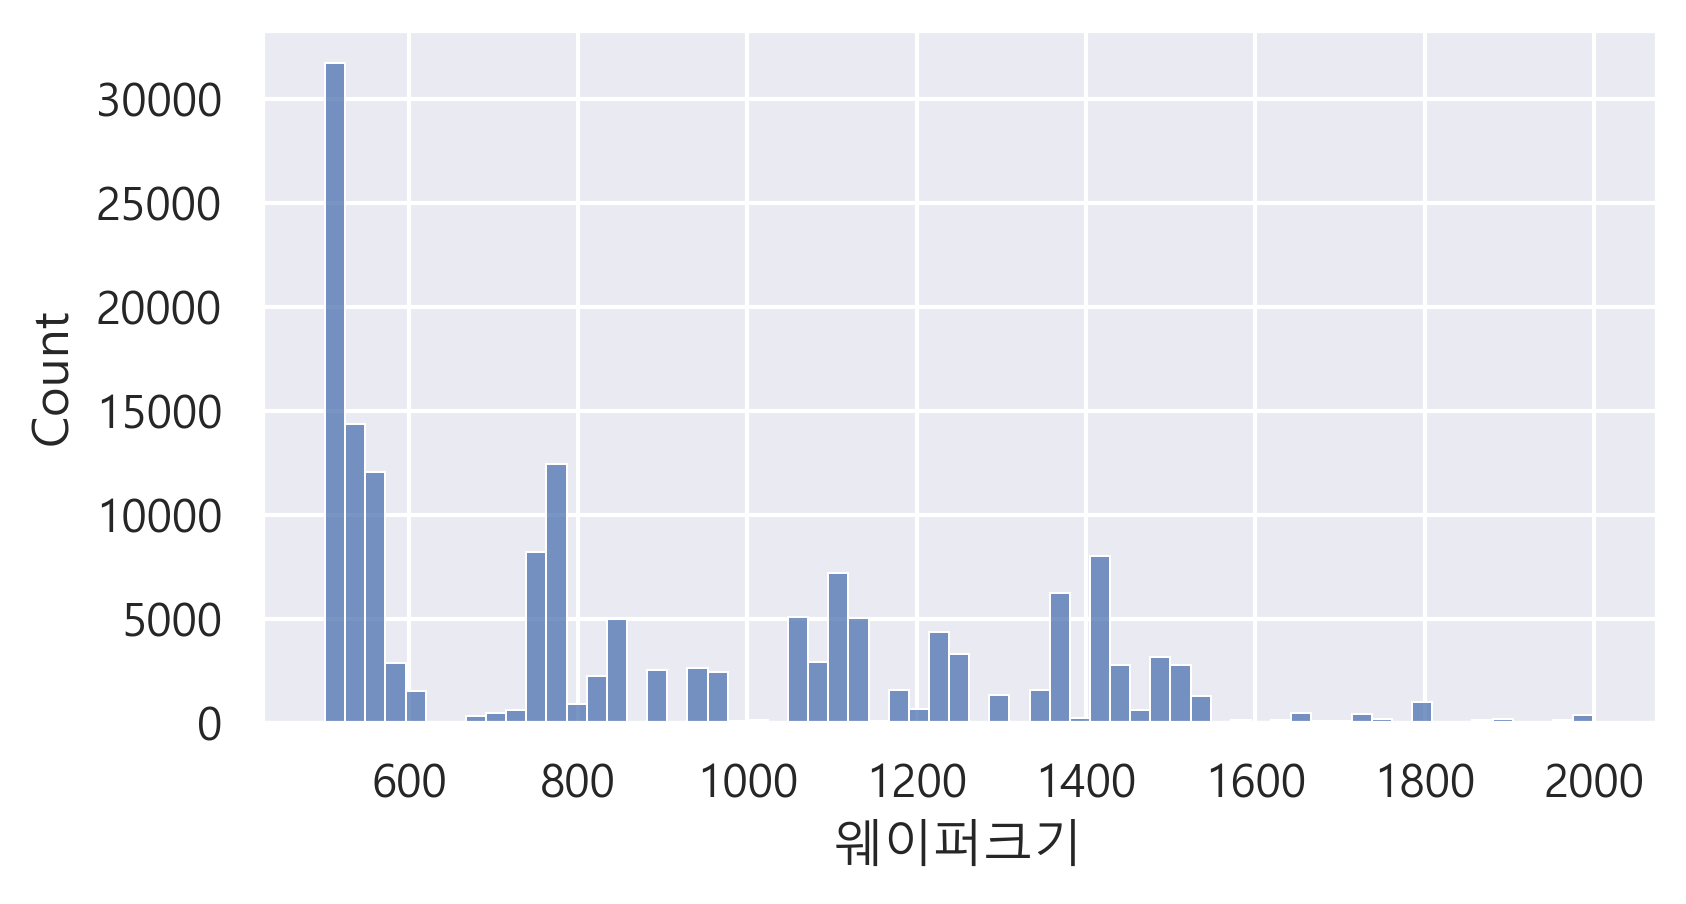

In [35]:
# 웨이퍼크기 count
sns.histplot(x="웨이퍼크기", data=df2)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'none'),
  Text(1, 0, 'Loc'),
  Text(2, 0, 'Edge-Ring'),
  Text(3, 0, 'Edge-Loc'),
  Text(4, 0, 'Scratch'),
  Text(5, 0, 'Random'),
  Text(6, 0, 'Center'),
  Text(7, 0, 'Near-full'),
  Text(8, 0, 'Donut')])

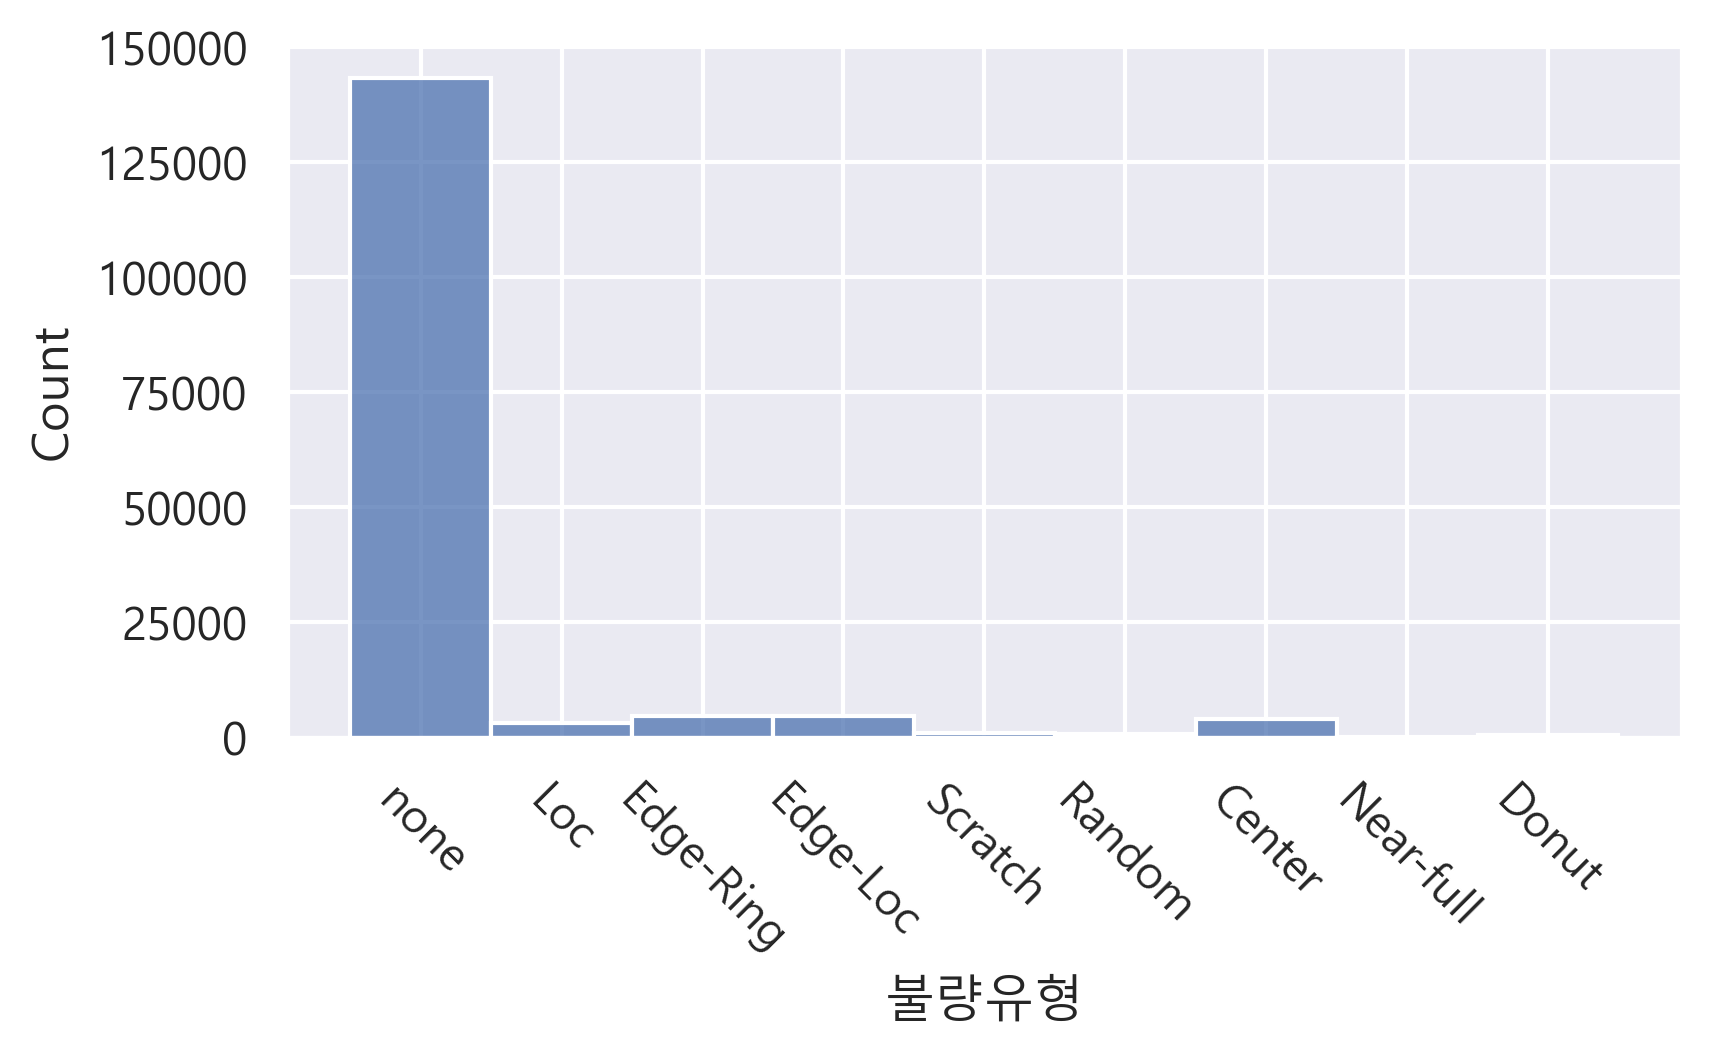

In [67]:
# 불량유형별로 count/ x축 텍스트 회전
sns.histplot(x="불량유형", data=df2)
plt.xticks(rotation = -45)

<Axes: xlabel='웨이퍼크기', ylabel='Count'>

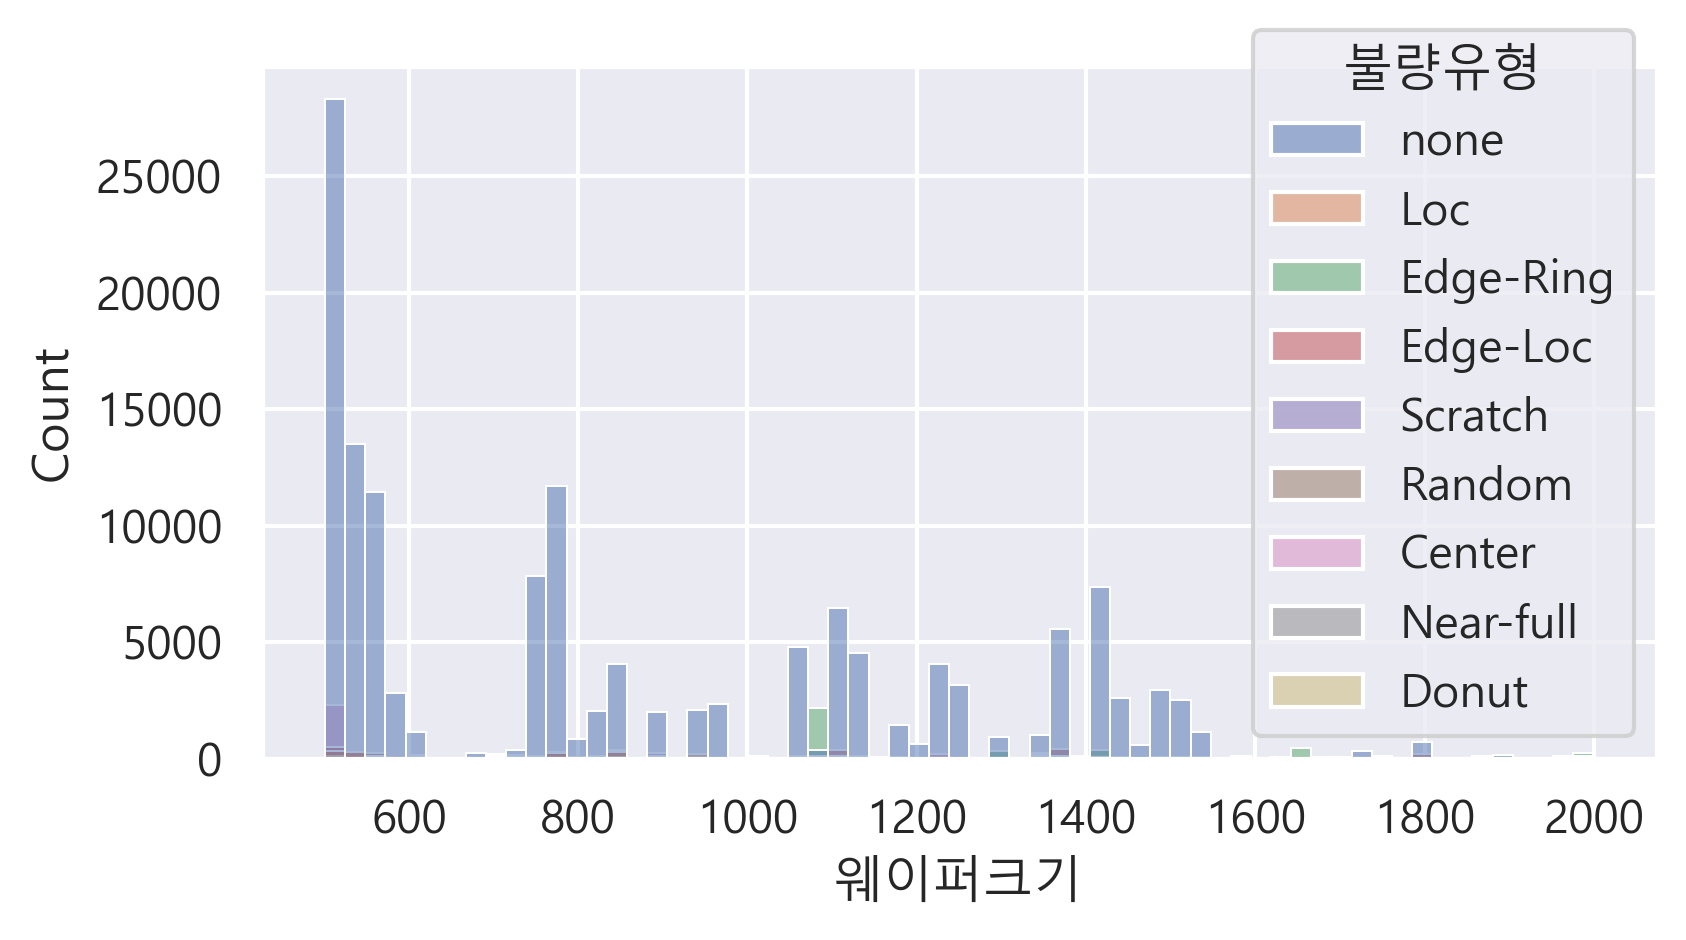

In [68]:
# 웨이퍼크기, 불량유형
sns.histplot(data=df2,x="웨이퍼크기", hue="불량유형")

#  scatter plot

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'none'),
  Text(1, 0, 'Loc'),
  Text(2, 0, 'Edge-Ring'),
  Text(3, 0, 'Edge-Loc'),
  Text(4, 0, 'Scratch'),
  Text(5, 0, 'Random'),
  Text(6, 0, 'Center'),
  Text(7, 0, 'Near-full'),
  Text(8, 0, 'Donut')])

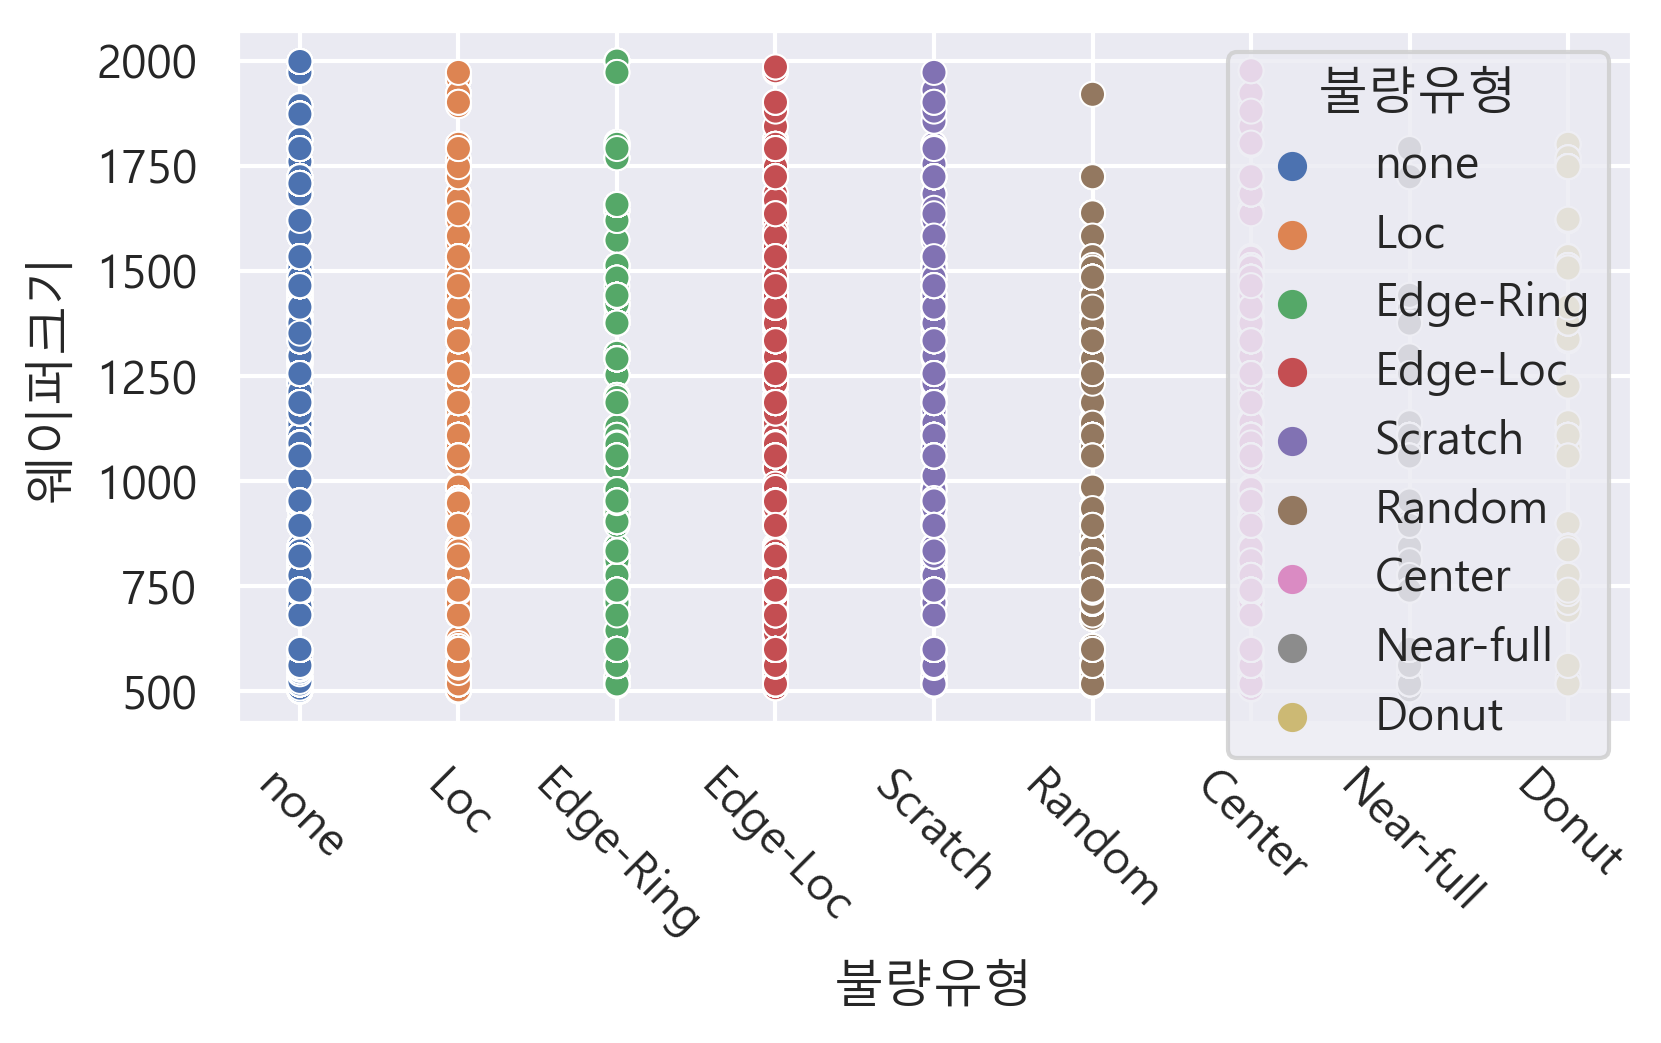

In [71]:
sns.scatterplot(x="불량유형",
               y="웨이퍼크기",
               data=df2,
               hue="불량유형")
plt.xticks(rotation = -45)

# box plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'none'),
  Text(1, 0, 'Loc'),
  Text(2, 0, 'Edge-Ring'),
  Text(3, 0, 'Edge-Loc'),
  Text(4, 0, 'Scratch'),
  Text(5, 0, 'Random'),
  Text(6, 0, 'Center'),
  Text(7, 0, 'Near-full'),
  Text(8, 0, 'Donut')])

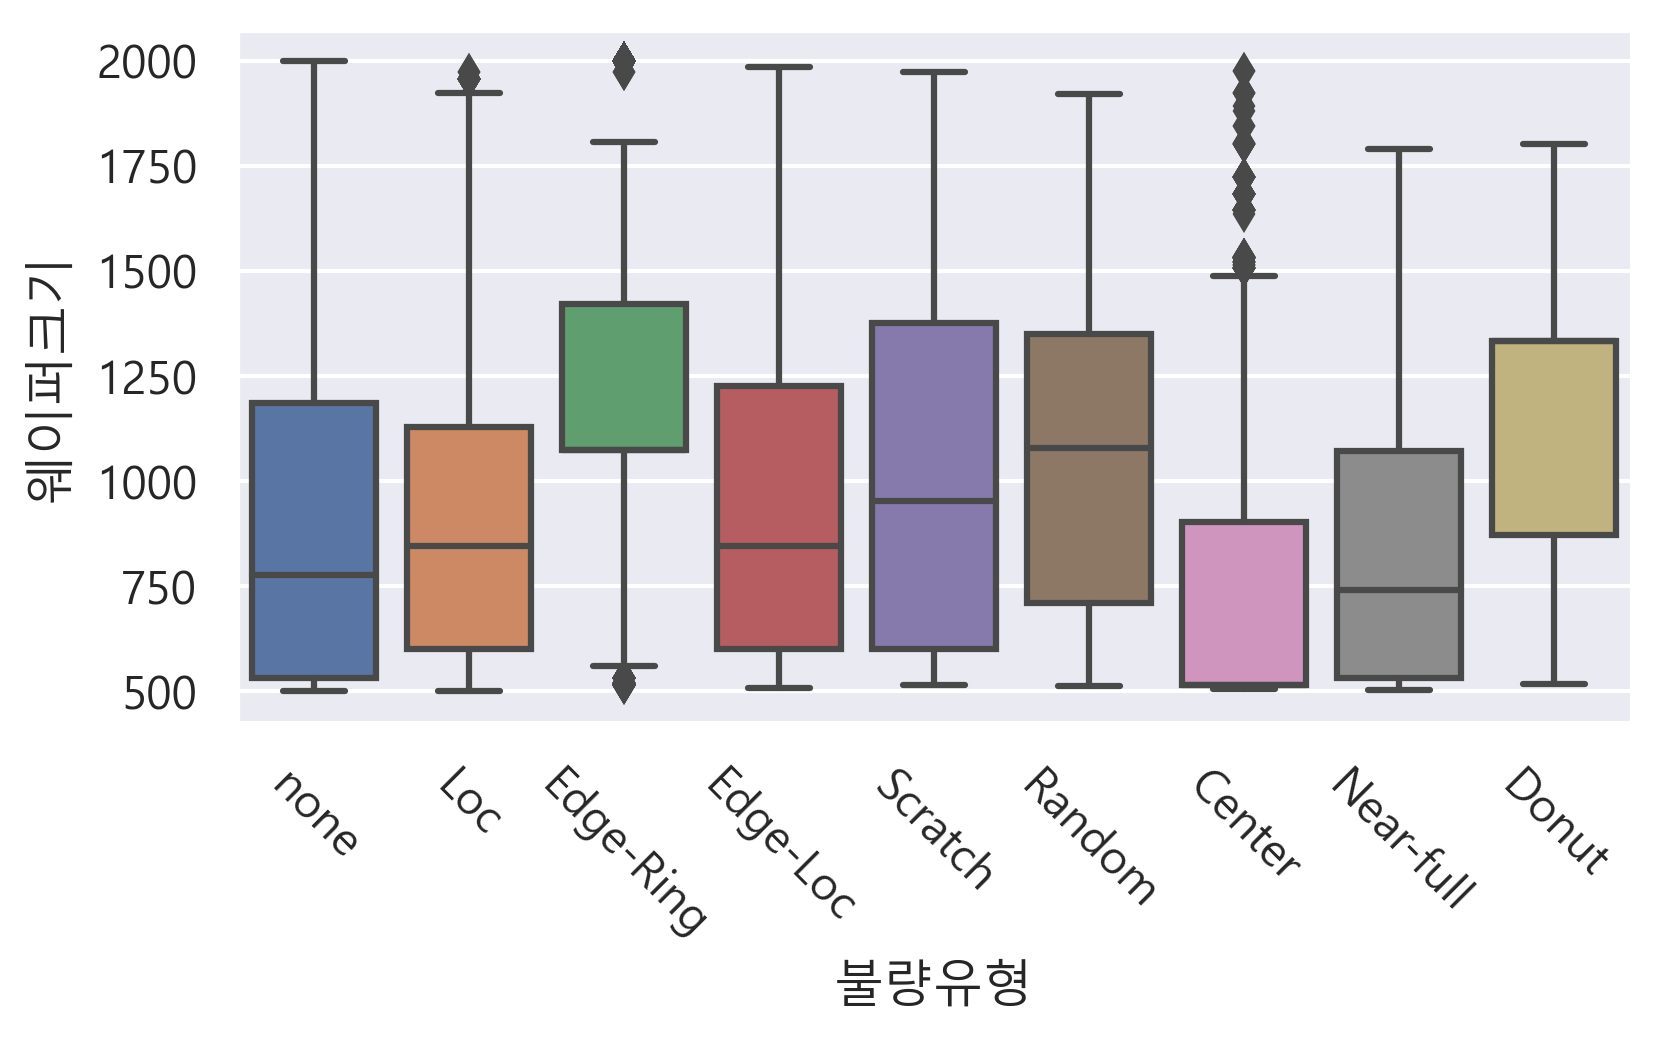

In [72]:
sns.boxplot(x="불량유형", y="웨이퍼크기", data=df2)
plt.xticks(rotation = -45)

# 웨이퍼맵 히트맵만들기 (실패)

# matplot

In [74]:
df2.shape

(162482, 5)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'none'),
  Text(1, 0, 'Loc'),
  Text(2, 0, 'Edge-Ring'),
  Text(3, 0, 'Edge-Loc'),
  Text(4, 0, 'Scratch'),
  Text(5, 0, 'Random'),
  Text(6, 0, 'Center'),
  Text(7, 0, 'Near-full'),
  Text(8, 0, 'Donut')])

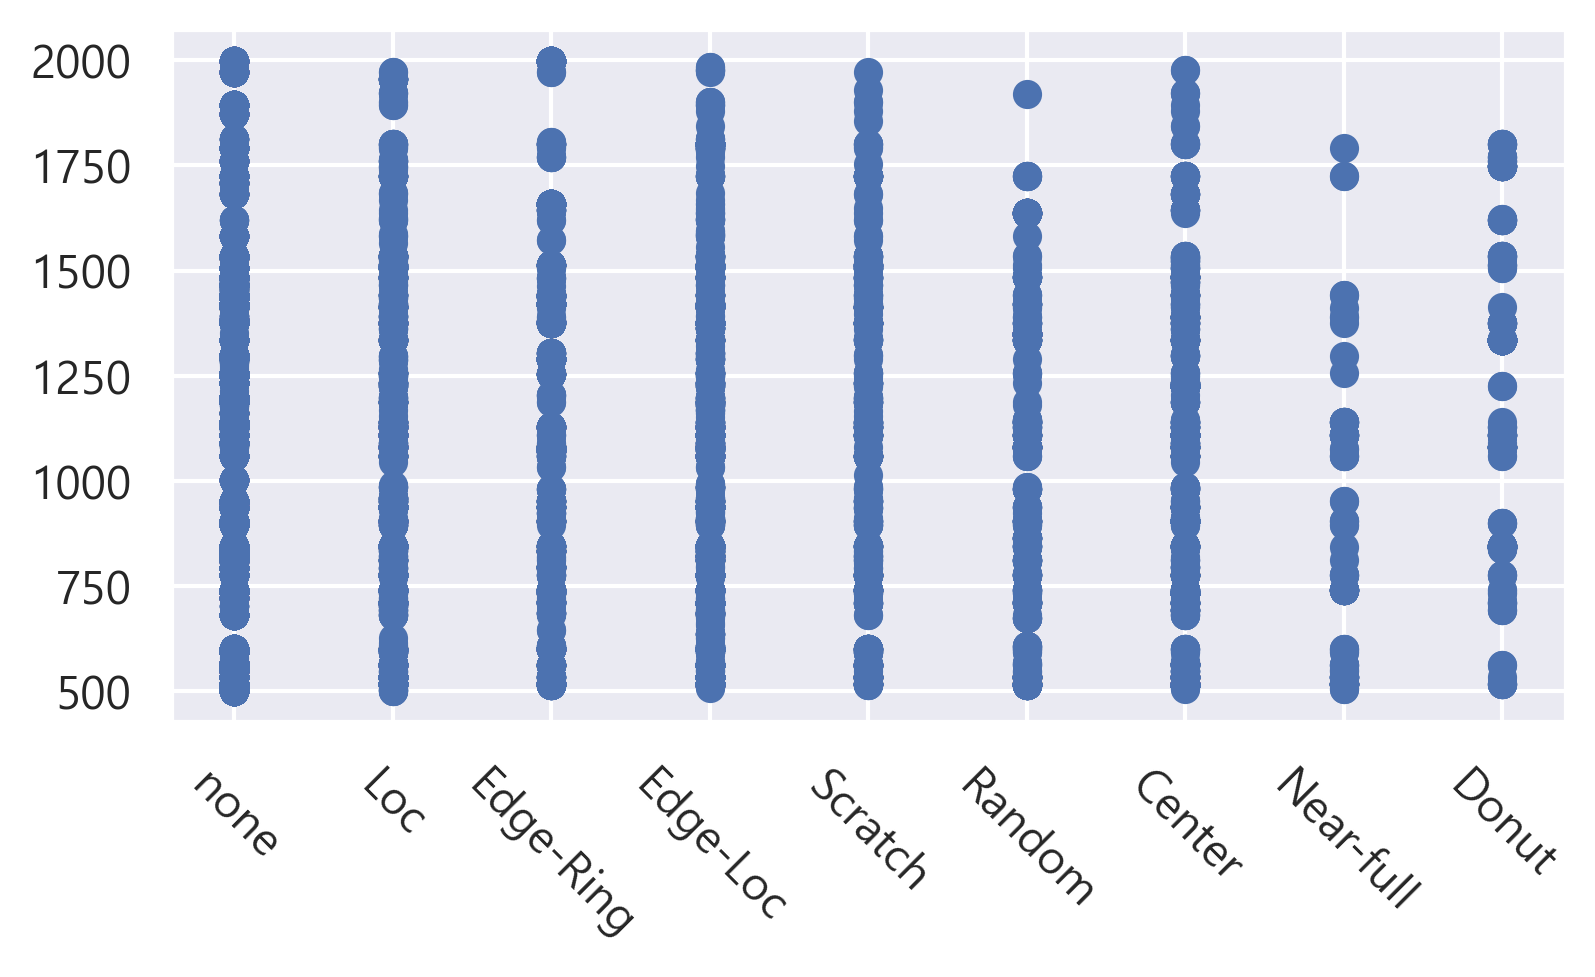

In [73]:
plt.scatter(df2['불량유형'],df2['웨이퍼크기'])
plt.xticks(rotation = -45)

([0, 1], [Text(0, 0, 'Training'), Text(1, 0, 'Test')])

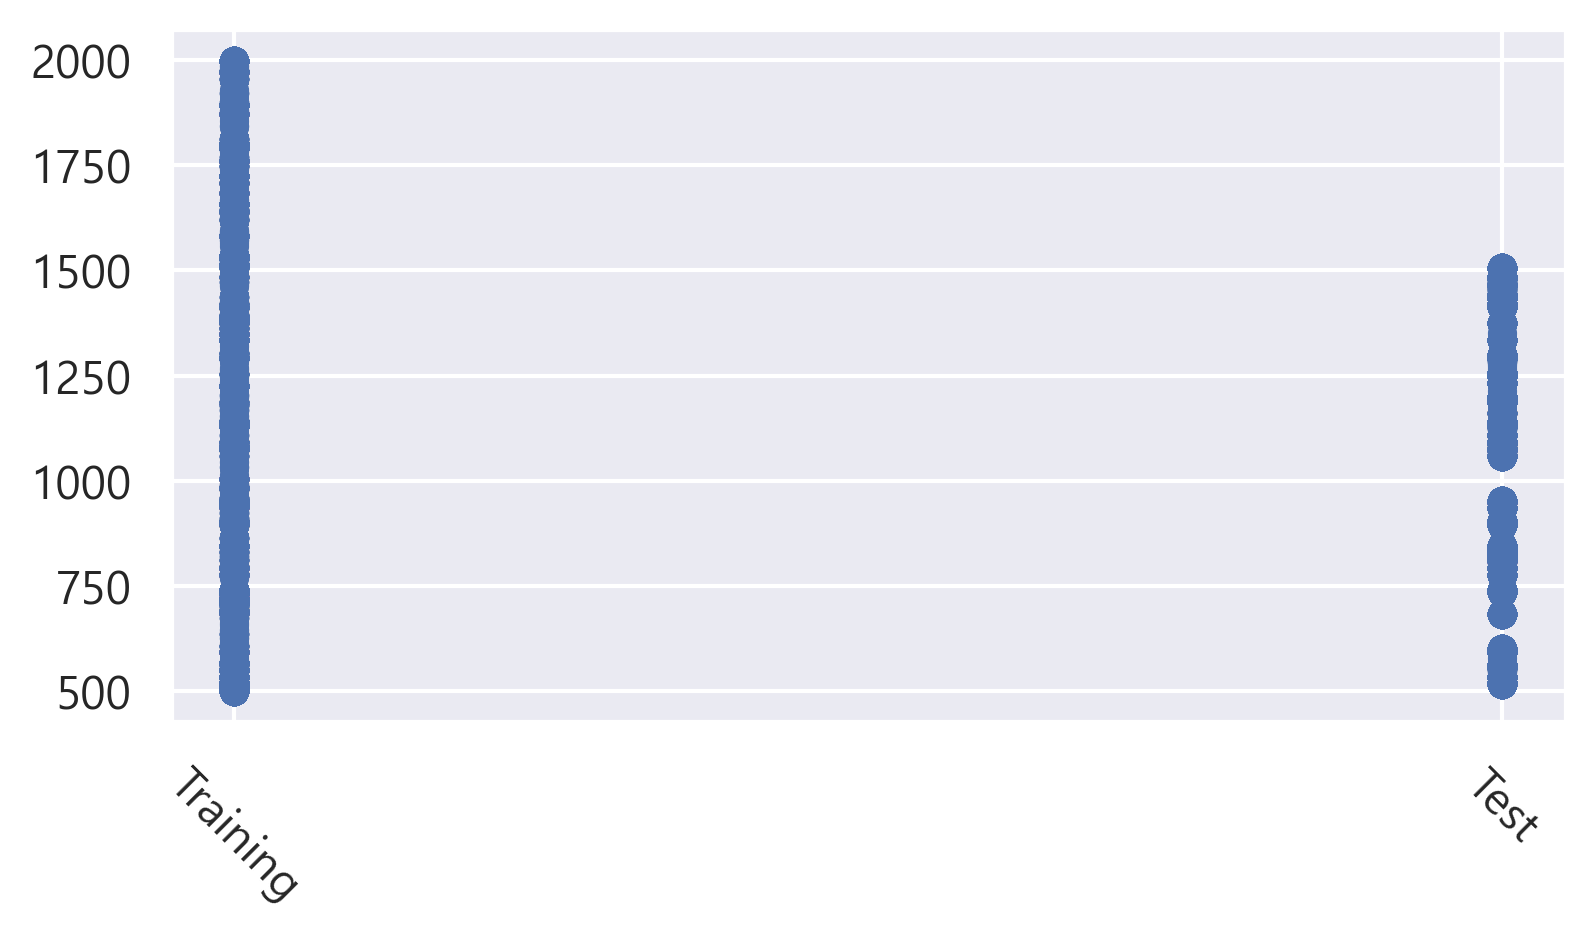

In [75]:
plt.scatter(df2['trianTestLabel'],df2['웨이퍼크기'])
plt.xticks(rotation = -45)

<Axes: xlabel='trianTestLabel', ylabel='Count'>

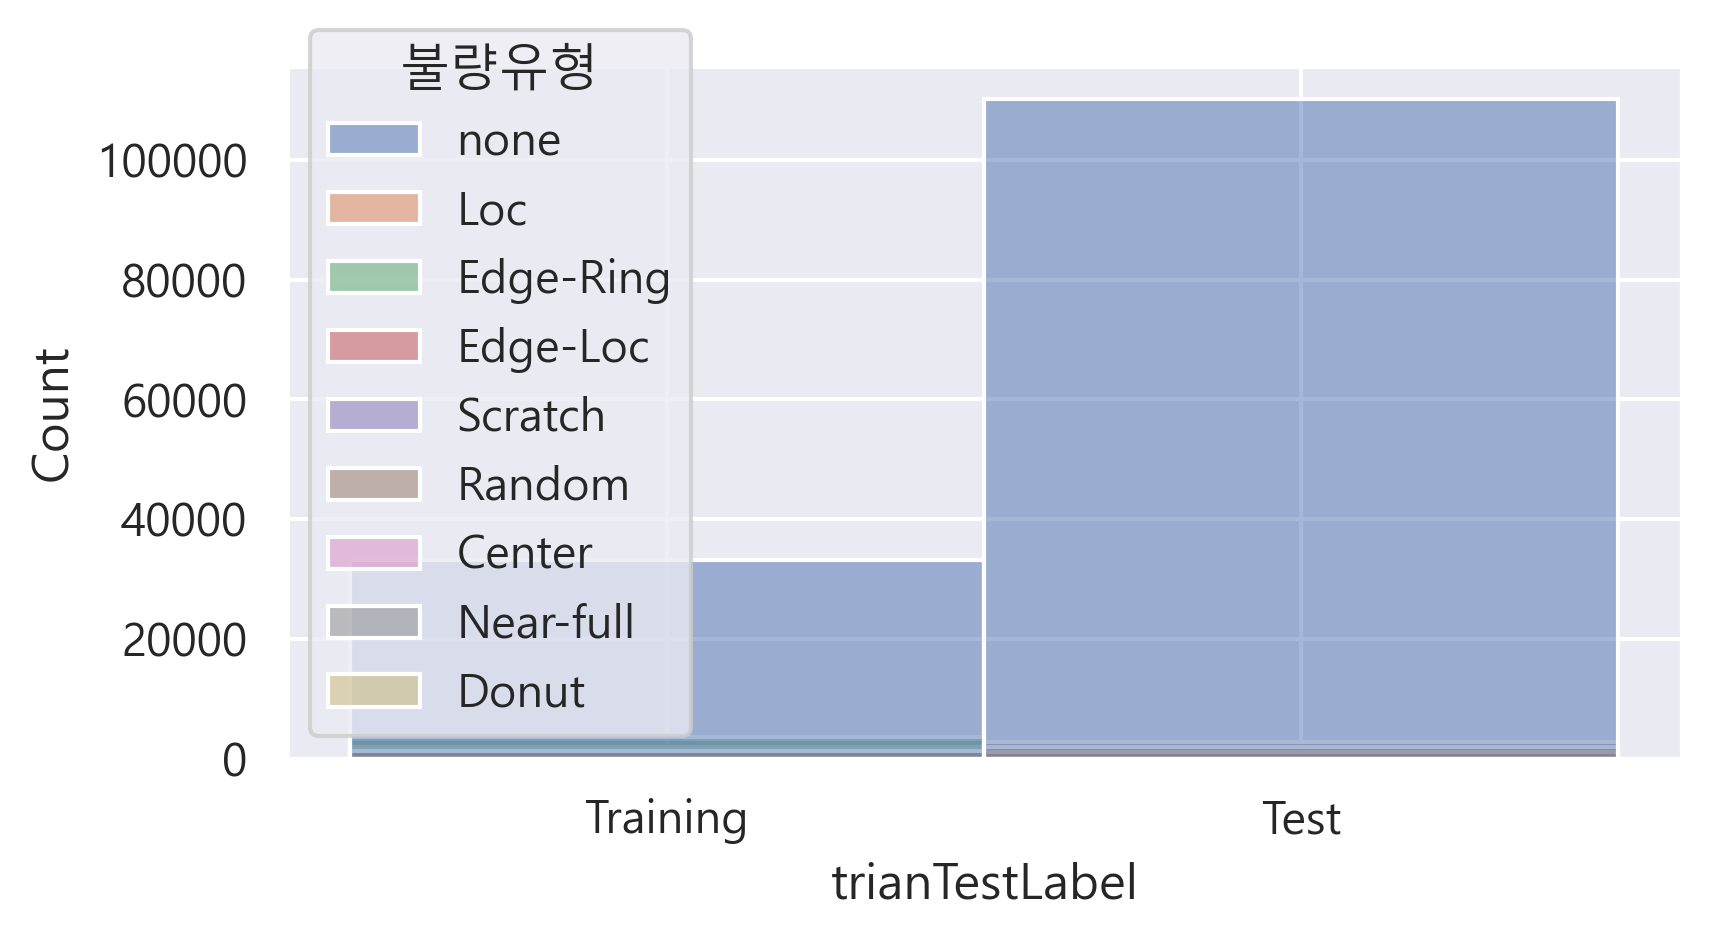

In [76]:
sns.histplot(data=df2,x="trianTestLabel", hue="불량유형")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'none'),
  Text(1, 0, 'Loc'),
  Text(2, 0, 'Edge-Ring'),
  Text(3, 0, 'Edge-Loc'),
  Text(4, 0, 'Scratch'),
  Text(5, 0, 'Random'),
  Text(6, 0, 'Center'),
  Text(7, 0, 'Near-full'),
  Text(8, 0, 'Donut')])

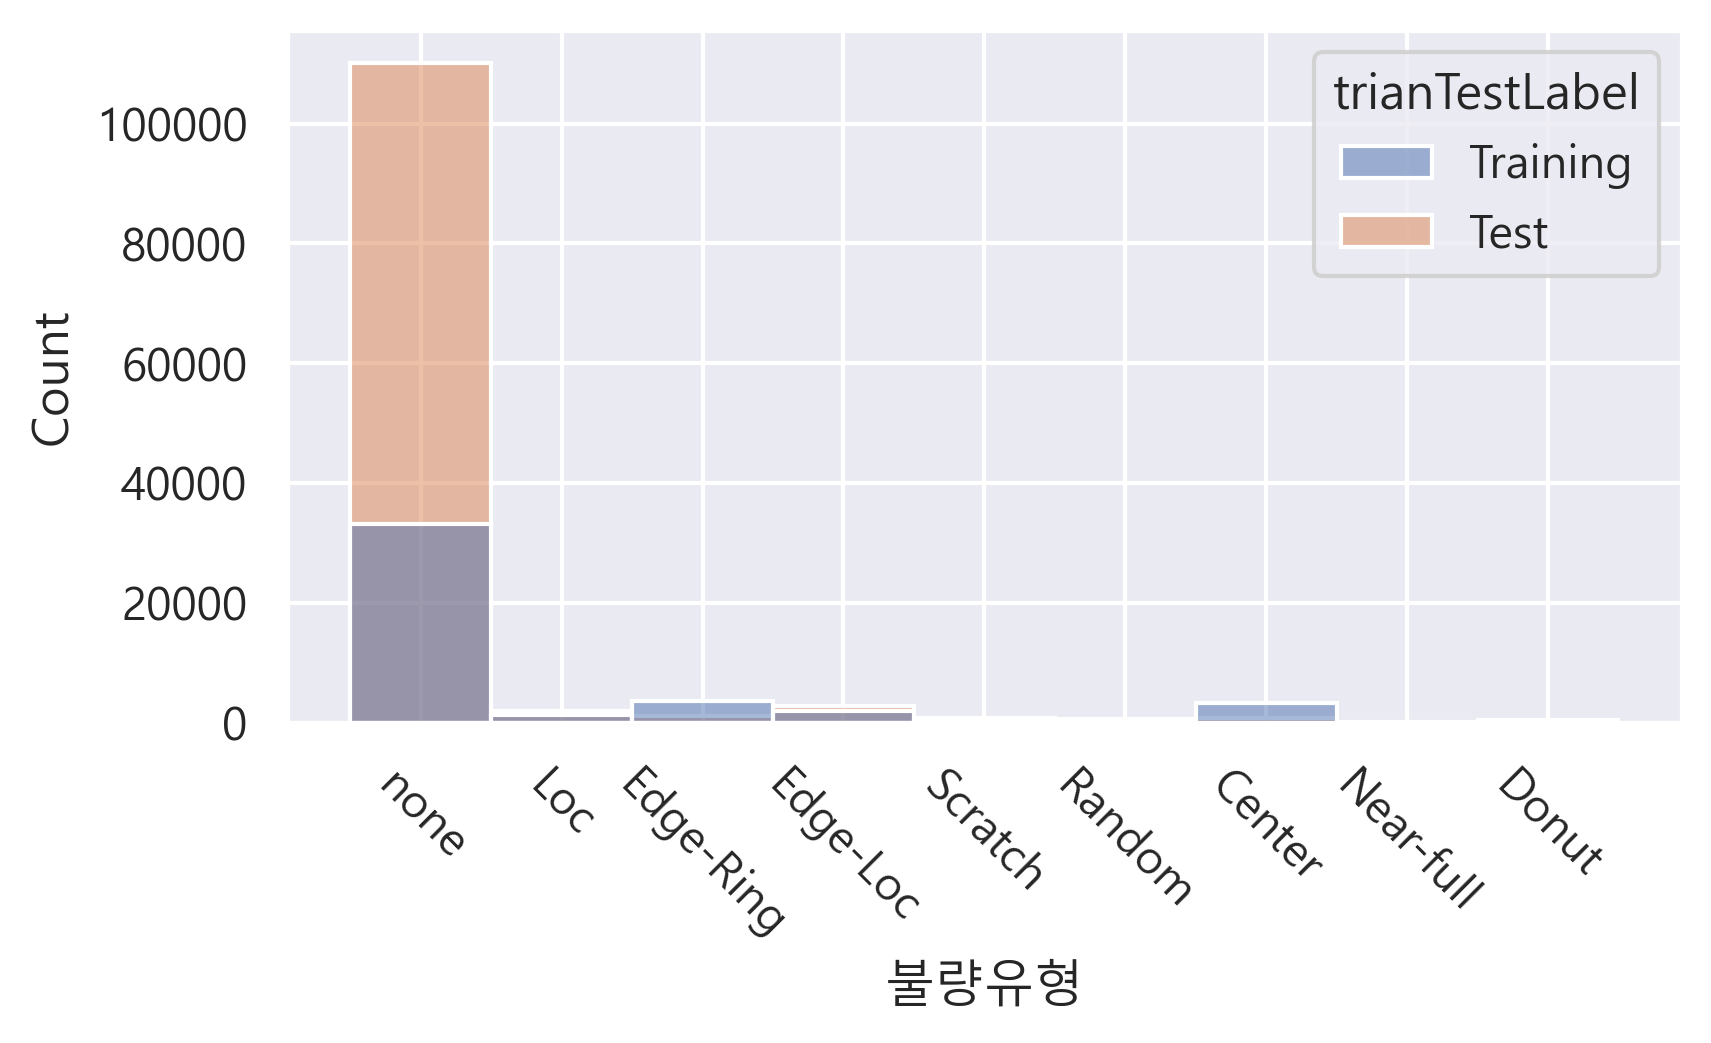

In [77]:
sns.histplot(data=df2,x="불량유형", hue="trianTestLabel")
plt.xticks(rotation = -45)

# 파이차트

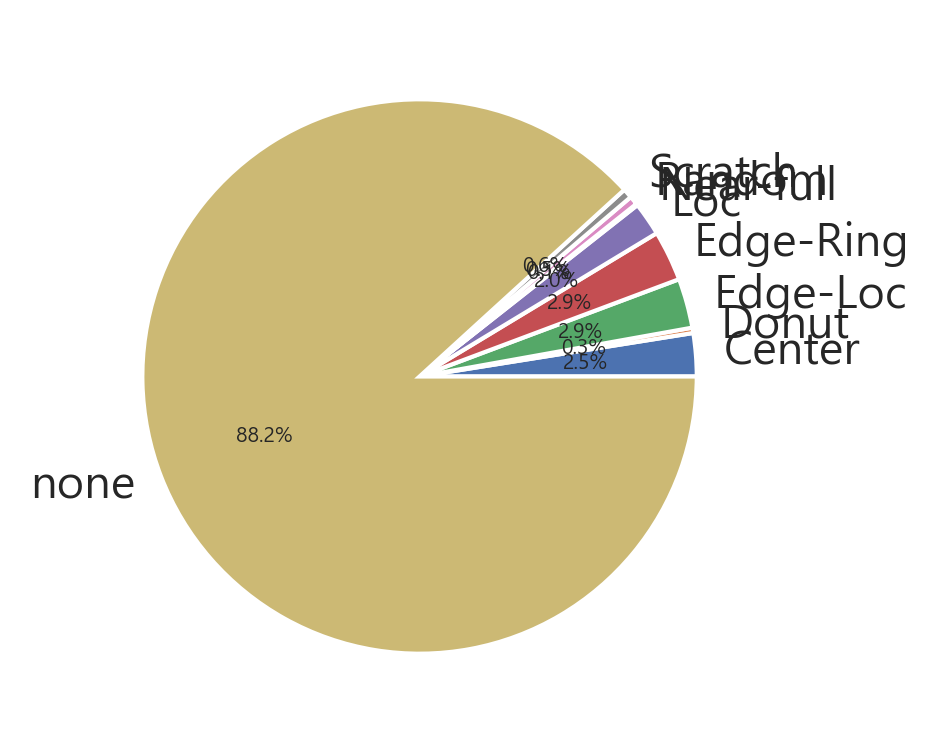

In [113]:
df_freq = df2.groupby('불량유형').size().reset_index(name='counts')

plt.pie(df_freq['counts'], labels=df_freq['불량유형'], autopct='%.1f%%')
plt.show()
plt.rcParams.update({'font.size': 5})

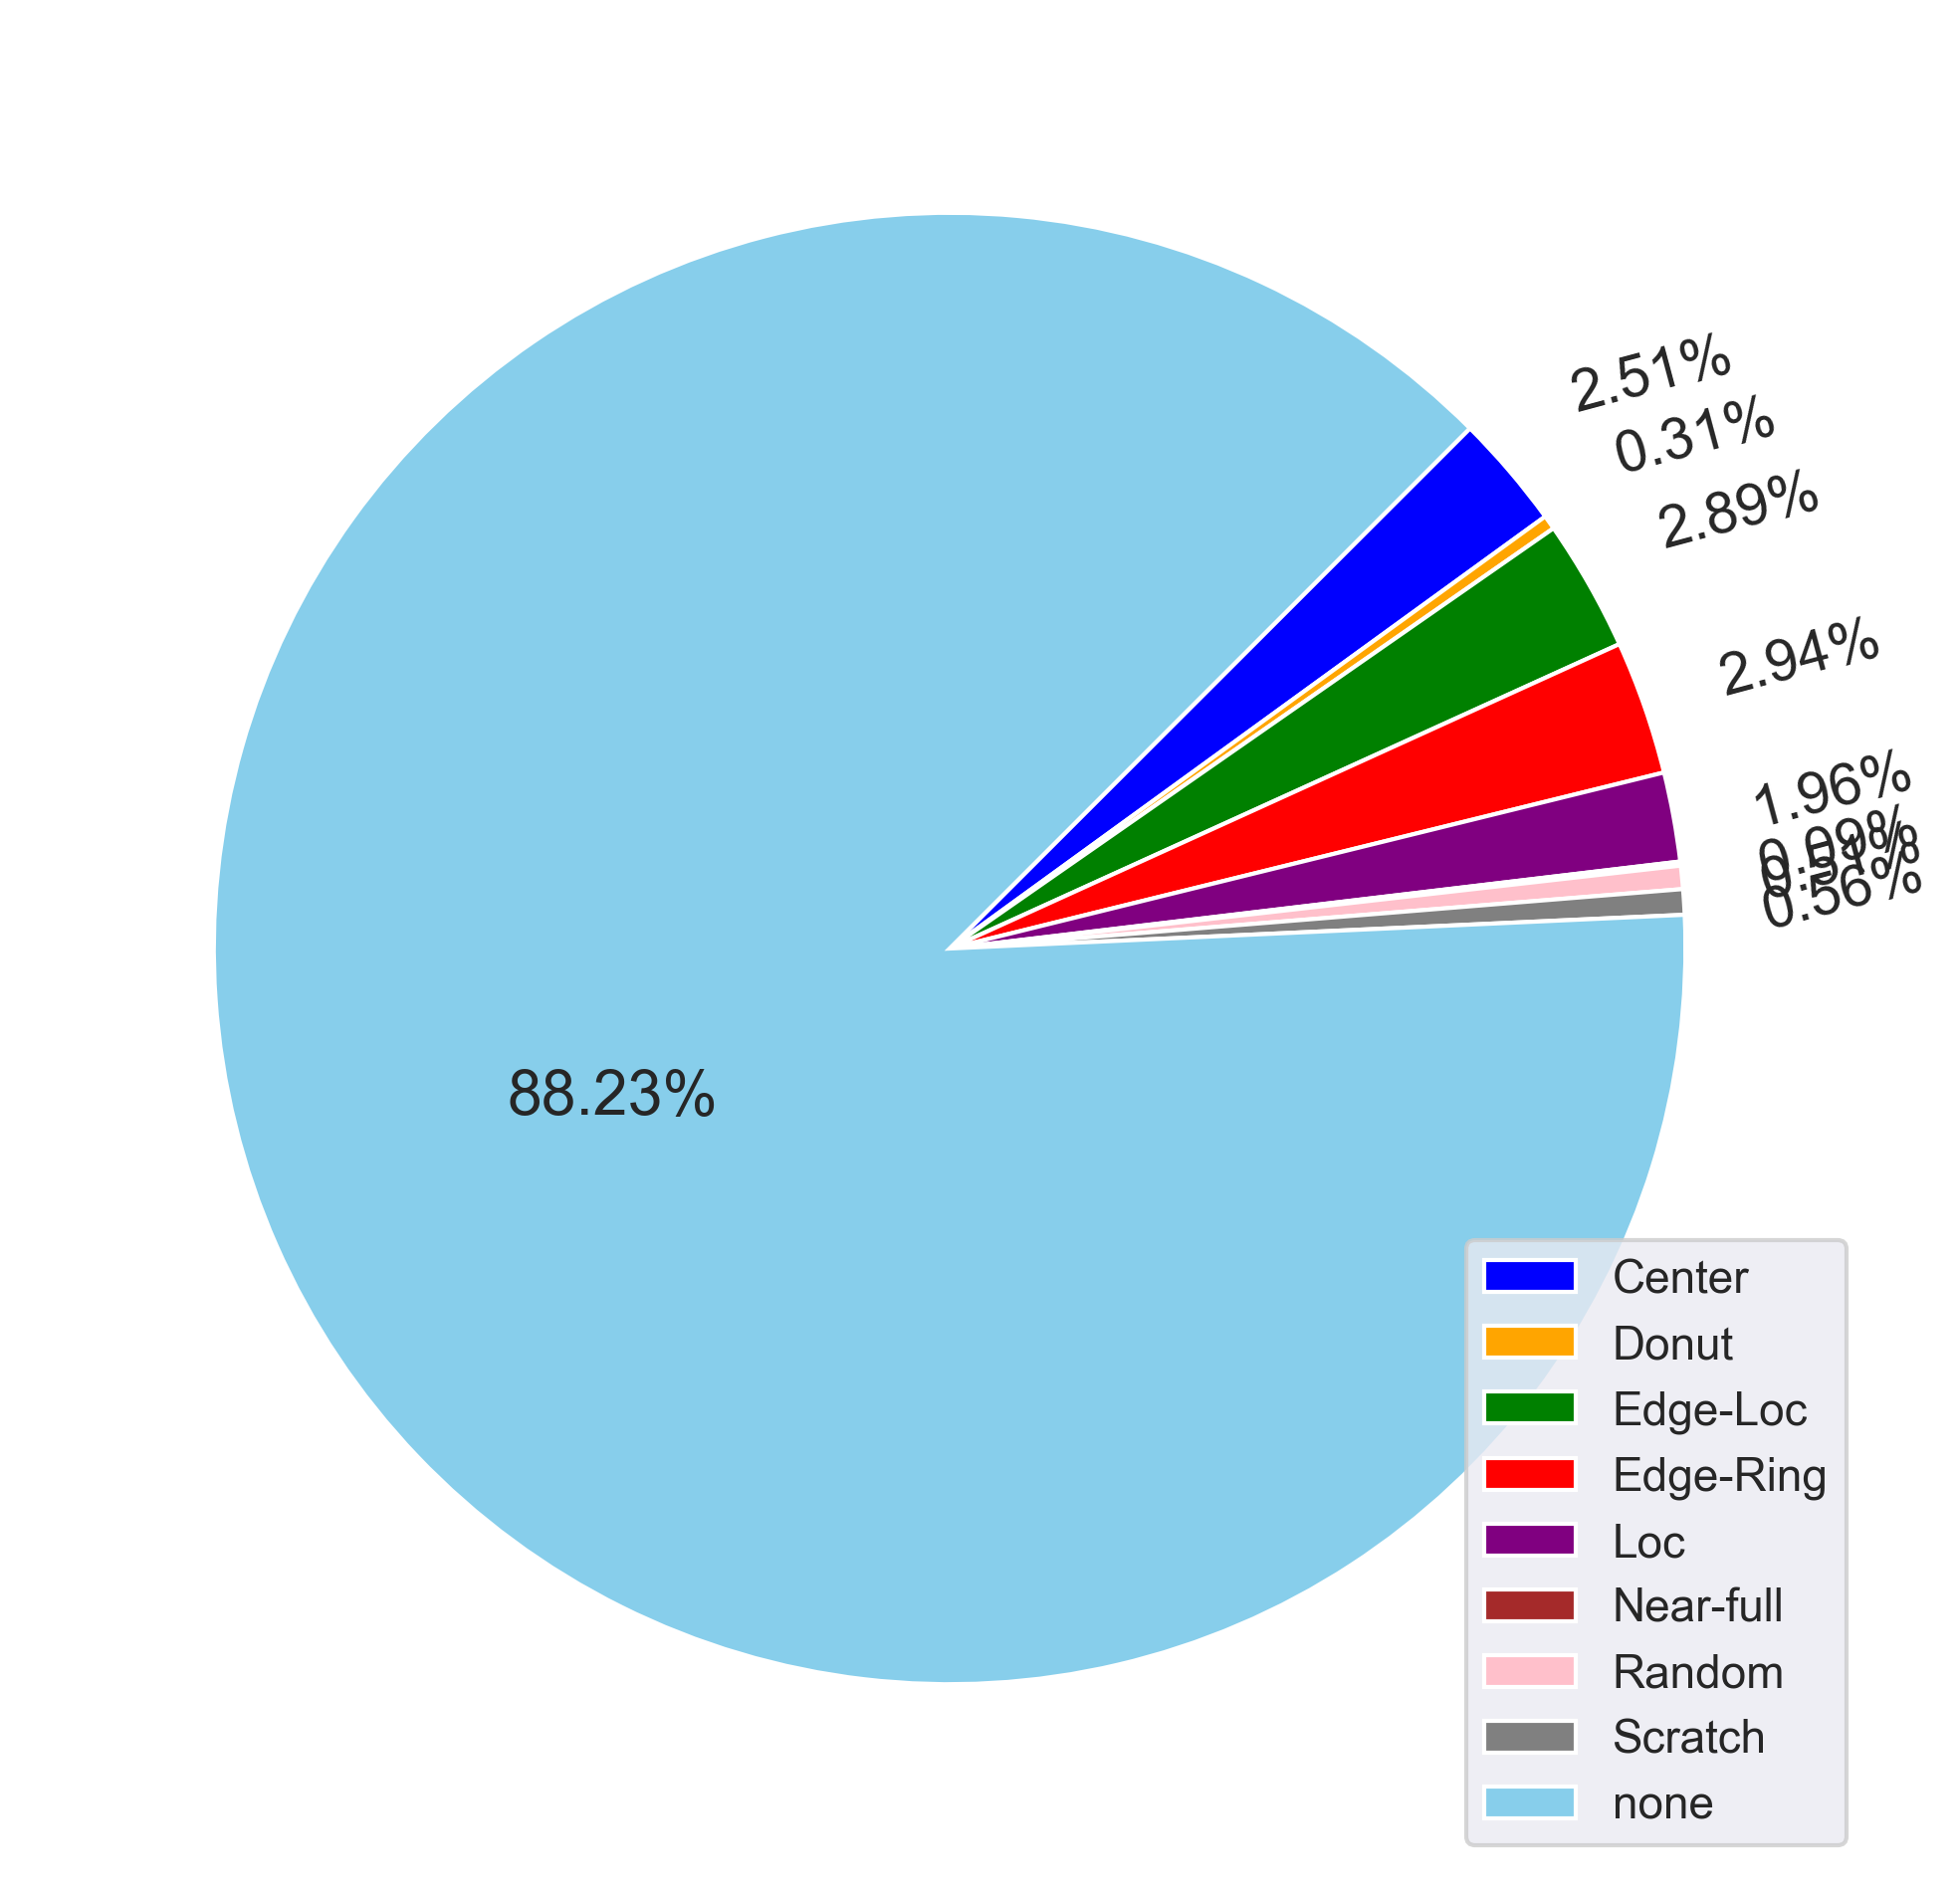

In [307]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})  # 폰트 크기 조정

colors = ['blue','orange','green','red','purple', 'brown', 'pink', 'grey', 'skyblue']
df_freq = df2.groupby('불량유형').size().reset_index(name='counts')

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()

pie = ax.pie(df_freq['counts'],
             startangle=45,
             counterclock=False,
             colors=colors,
            )

total = np.sum(df_freq['counts'])

threshold = 5
sum_pct = 0

bbox_props = dict(boxstyle='square', fc='w', ec='w', alpha=0)

config = dict(arrowprops=dict(arrowstyle='-'), bbox=bbox_props, va='center')

for i, l in enumerate(df_freq['불량유형']):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2
    center, r = ax.patches[i].center, ax.patches[i].r

    if i < len(df_freq['불량유형']) - 1:
        sum_pct += float(f'{df_freq["counts"][i]/total*100:.2f}')
        text = f'{df_freq["counts"][i]/total*100:.2f}%'
    else:
        text = f'{100-sum_pct:.2f}%'

    if df_freq['counts'][i]/total*100 < threshold:
        ang = (ang1+ang2)/2
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))

        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        config["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(text, xy=(x, y), xytext=(1.1*x, 1.2*y),
                    horizontalalignment=horizontalalignment,rotation=15, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0]
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1]
        ax.text(x, y, text, ha='center', va='center', fontsize=15)  # fontsize 조정

plt.legend(pie[0], df_freq['불량유형'], loc='lower right')
plt.show()

# 불량유형에서  none데이터 제외하고 차트 만들기

In [79]:
df3 = df2.loc[df2['불량유형'] != 'none']

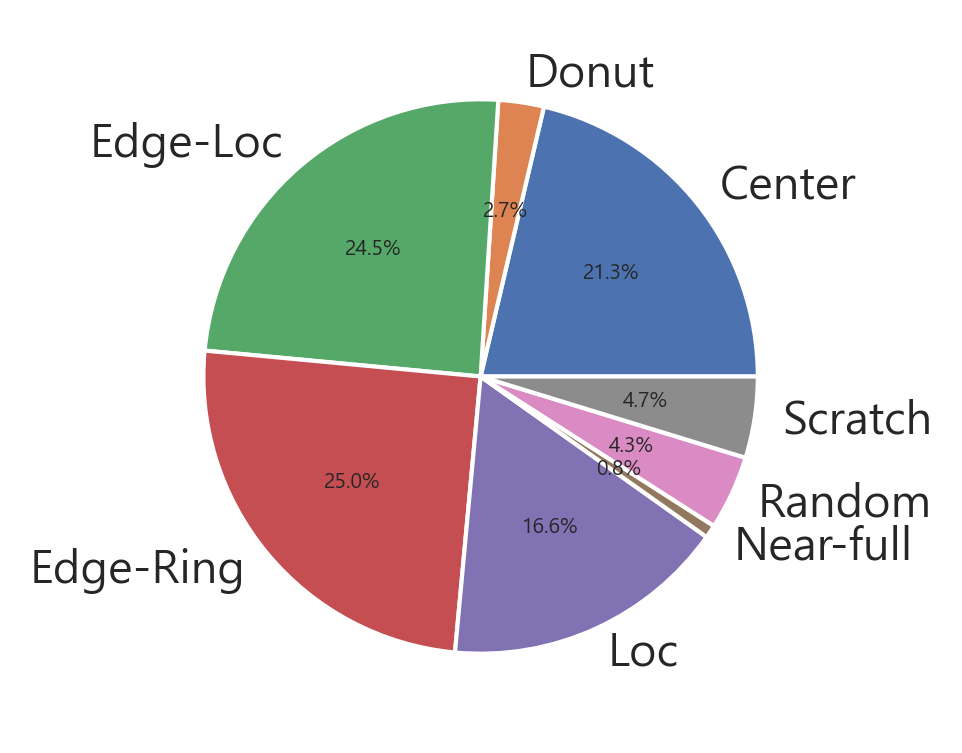

In [247]:
df_freq = df3.groupby('불량유형').size().reset_index(name='counts')

# 파이 차트 그리기
plt.pie(df_freq['counts'], labels=df_freq['불량유형'], autopct='%.1f%%')
plt.show()
plt.rcParams.update({'font.size': 5})

<Axes: xlabel='trianTestLabel', ylabel='Count'>

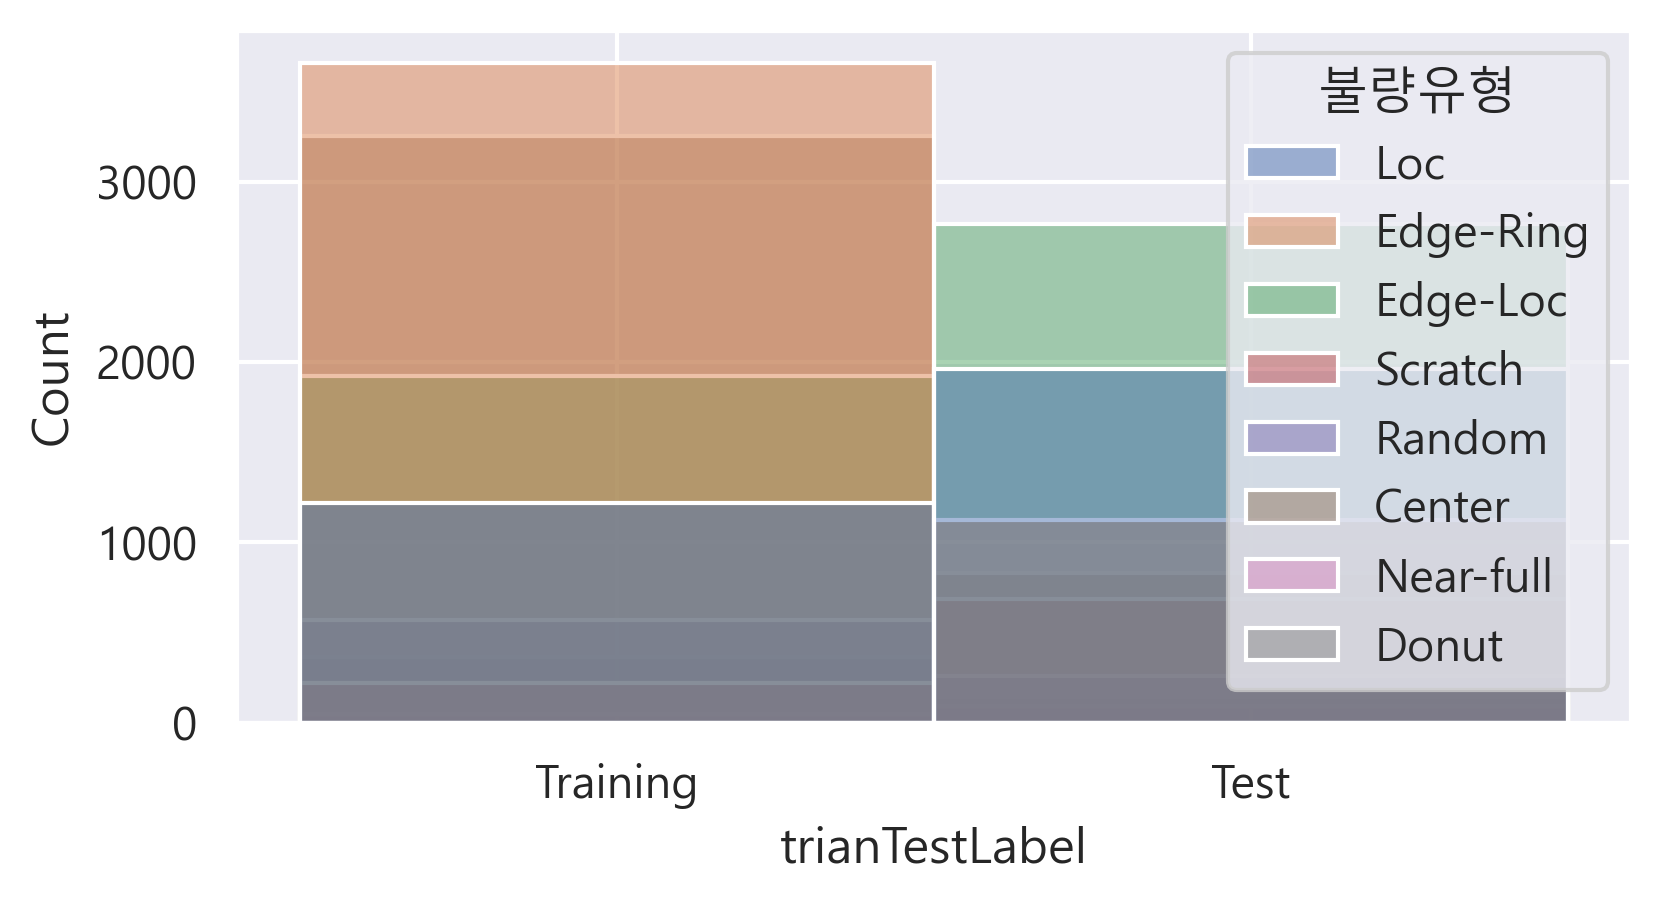

In [86]:
# trianTestLabel 의 열을 기준으로  불량유형의 빈도를 히스토그램으로 시각화
sns.histplot(data=df3,x="trianTestLabel", hue="불량유형")

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Loc'),
  Text(1, 0, 'Edge-Ring'),
  Text(2, 0, 'Edge-Loc'),
  Text(3, 0, 'Scratch'),
  Text(4, 0, 'Random'),
  Text(5, 0, 'Center'),
  Text(6, 0, 'Near-full'),
  Text(7, 0, 'Donut')])

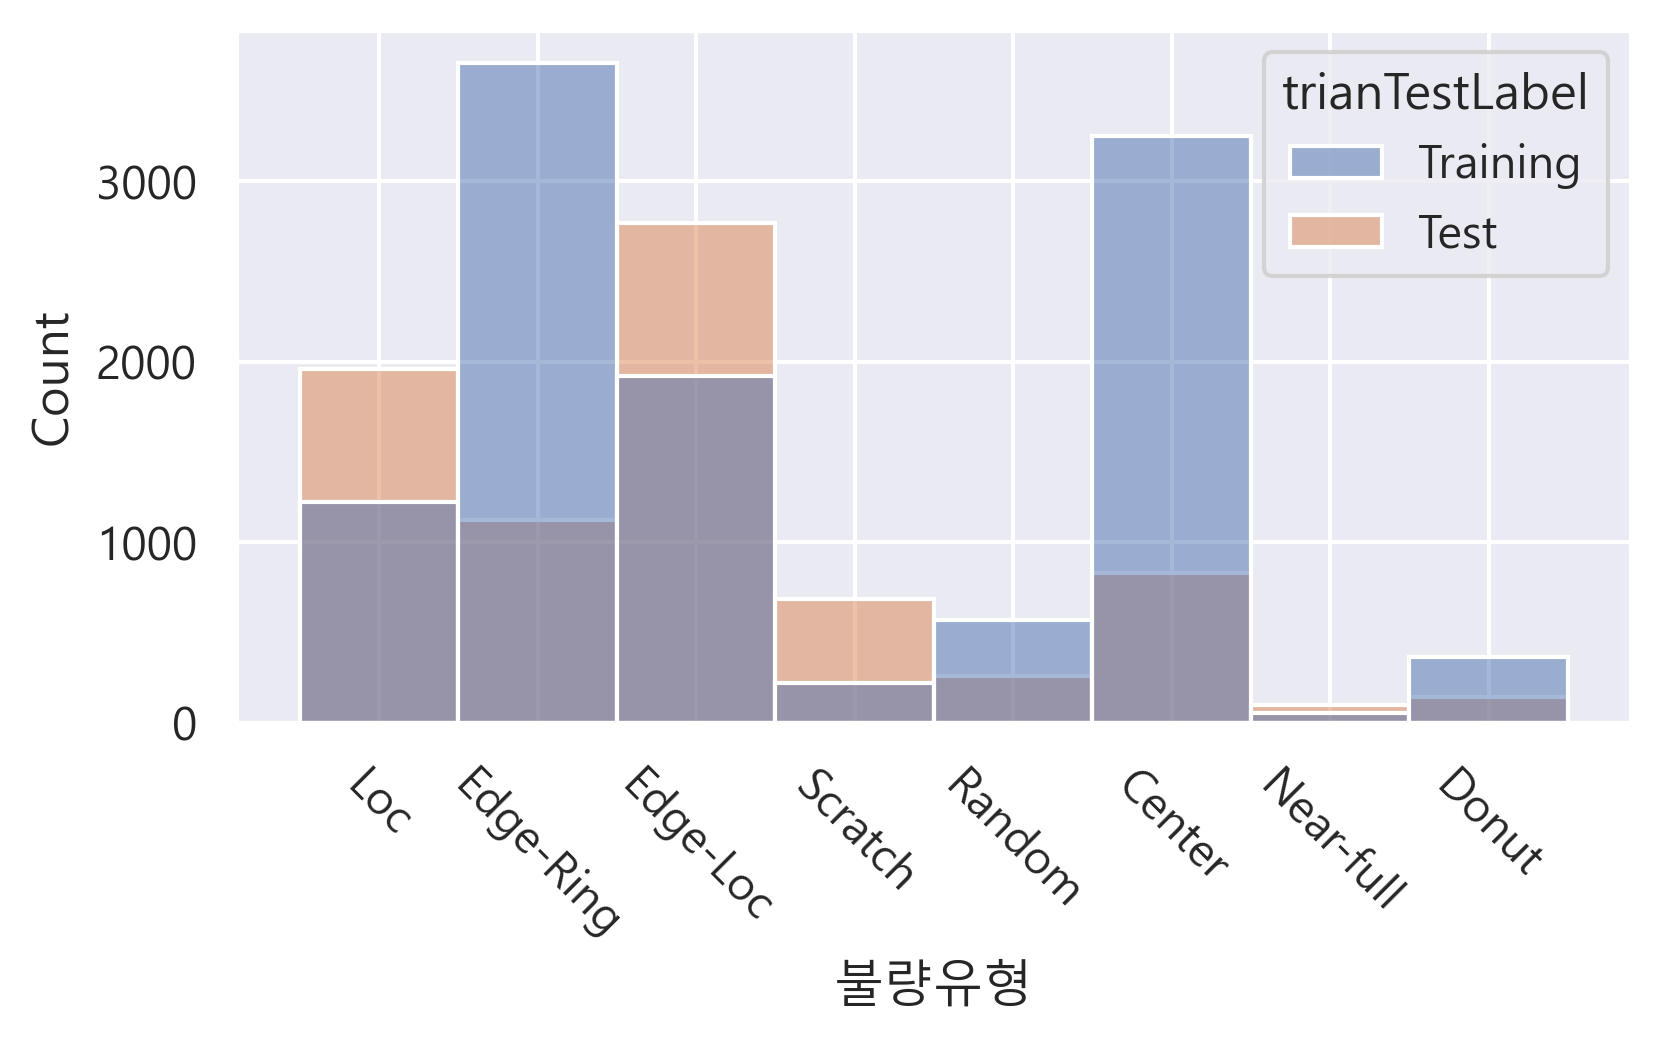

In [87]:
#  위의 차트에서 x축,y축만 바꾼 차트 
# 불량유형의 열을 기준으로  trianTestLabel의 빈도를 히스토그램으로 시각화
sns.histplot(data=df3,x="불량유형", hue="trianTestLabel")
plt.xticks(rotation = -45)

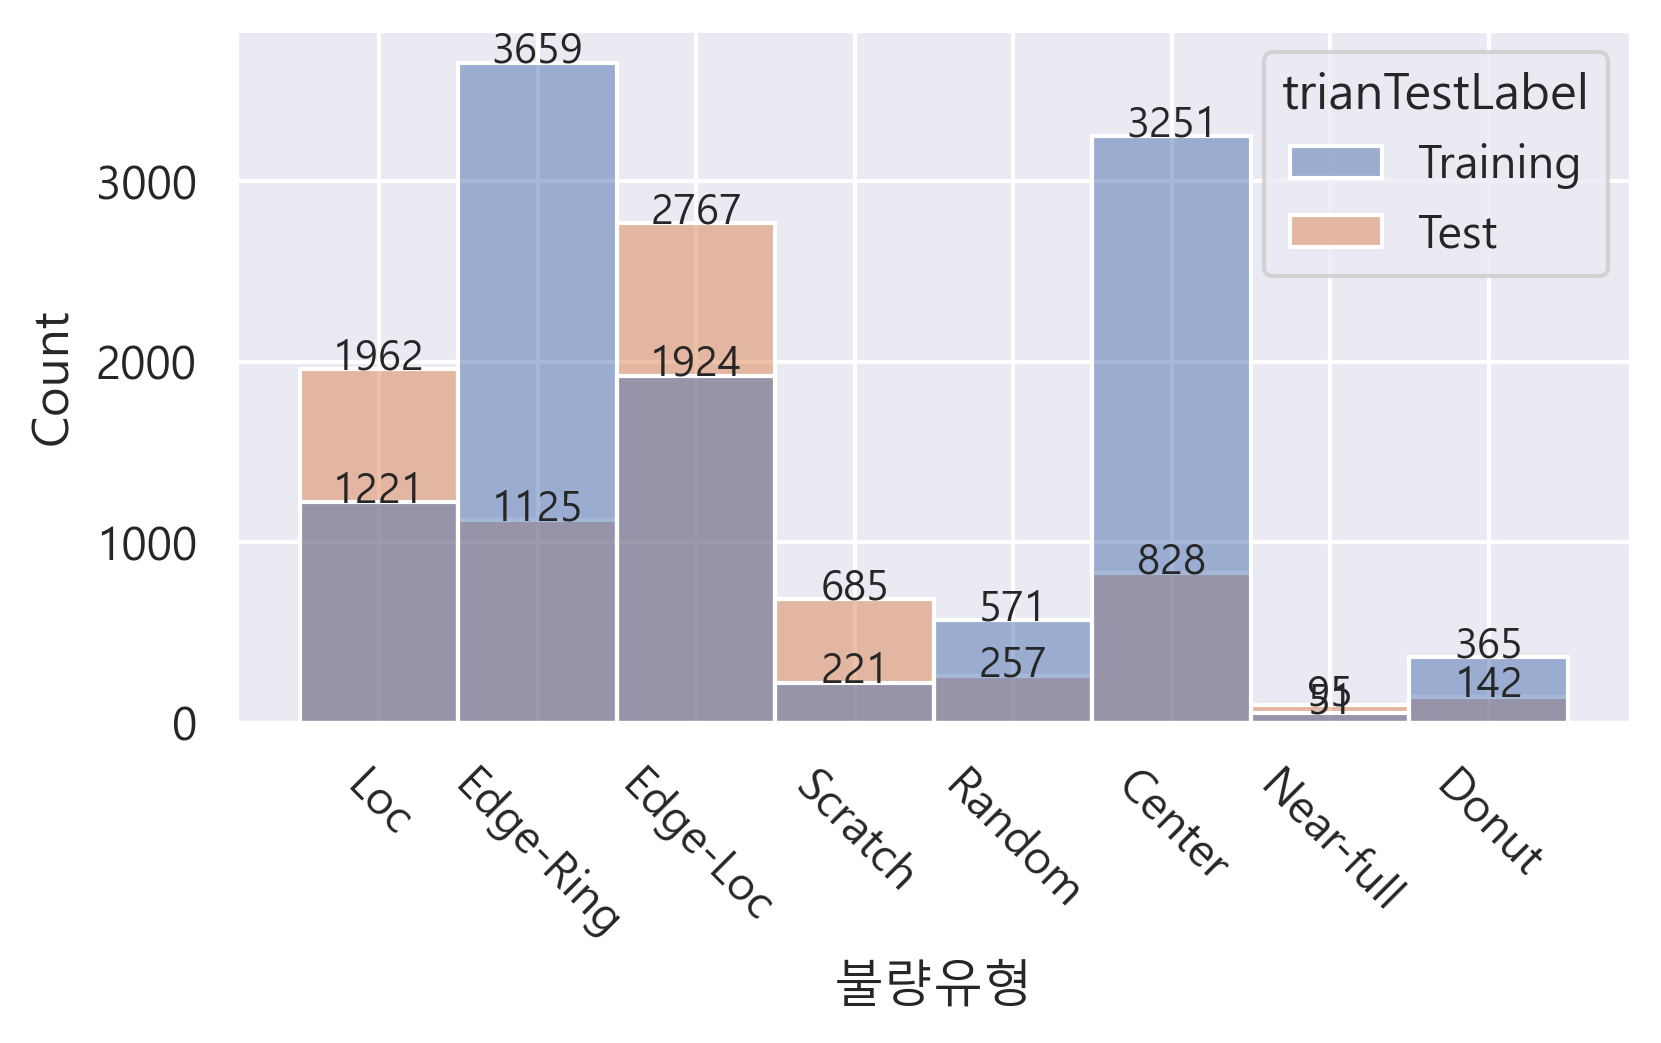

In [88]:
# 숫자추가
# 히스토그램 그리기
sns.histplot(data=df3, x="불량유형", hue="trianTestLabel")

# x축 라벨 회전
plt.xticks(rotation=-45)

# 각 막대의 위치와 높이 가져오기
patches = plt.gca().patches
for patch in patches:
    # 막대 높이
    height = patch.get_height()
    # 막대 위치
    x = patch.get_x() + patch.get_width() / 2
    # 텍스트 쓰기
    plt.text(x, height, f'{height}', ha='center', fontsize=10)
    
# 그래프 보여주기
plt.show()
